In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler



# Definindo o estilo e contexto
plt.style.use('ggplot')  # Estilo alternativo
sns.set_context('notebook')  # Contexto ideal para notebooks

In [ ]:
# Carregar os dados
df = pd.read_csv('../data/resultado_consulta_credenciamento.csv')

# Verificar as primeiras linhas para garantir que os dados foram carregados corretamente
df.head()

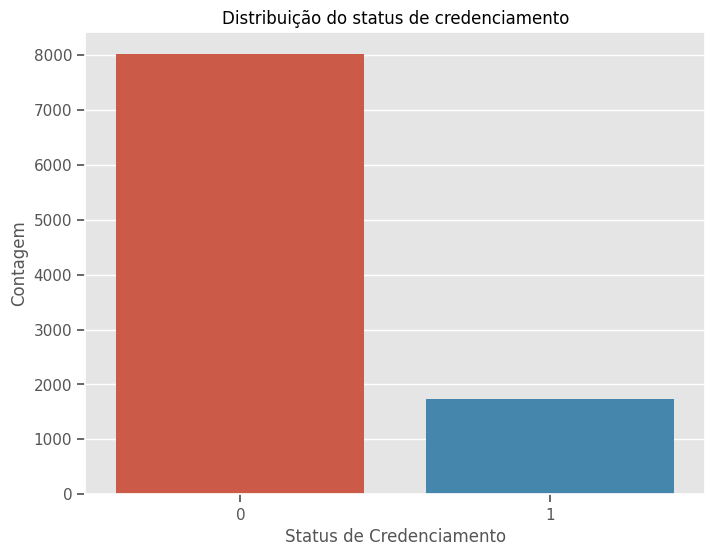

In [20]:
# Estrutura dos dados
#df.info()

# Estatísticas descritivas
#df.describe()

# Verificar valores ausentes
#df.isnull().sum()

# Contagem de cada classe
class_counts = df['statuscredenciamentoid'].value_counts()
class_counts
# Plotagem do gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribuição do status de credenciamento')
plt.xlabel('Status de Credenciamento')
plt.ylabel('Contagem')
plt.show()


In [21]:
class_counts


statuscredenciamentoid
0    8016
1    1734
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Carregar os dados
df = pd.read_csv('../data/resultado_consulta_credenciamento.csv')

# Selecionando apenas as colunas numéricas para normalização
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Selecionando apenas as colunas categóricas para codificação one-hot
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Definindo as etapas de pré-processamento para colunas numéricas e categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combina as etapas de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline de pré-processamento e modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42))])

# Divisão dos dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
pipeline.fit(X_train, y_train)

# Predições no conjunto de teste
y_pred = pipeline.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

# Relatório de classificação
print('\nRelatório de Classificação:')
print(classification_report(y_test, y_pred))


ValueError: A given column is not a column of the dataframe